In [2]:
# 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 다항 회귀(Polynomial Regression)

- Polynomial Regression과 과대적합/과소적합의 이해

## 다항 회귀(Polynomial Regression) 이해

**다중선형회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현

**다항회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
- 선형회귀임

$ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

$ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**
- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환

PolynomialFeatures(degree=차수)

fit_transform(피처)

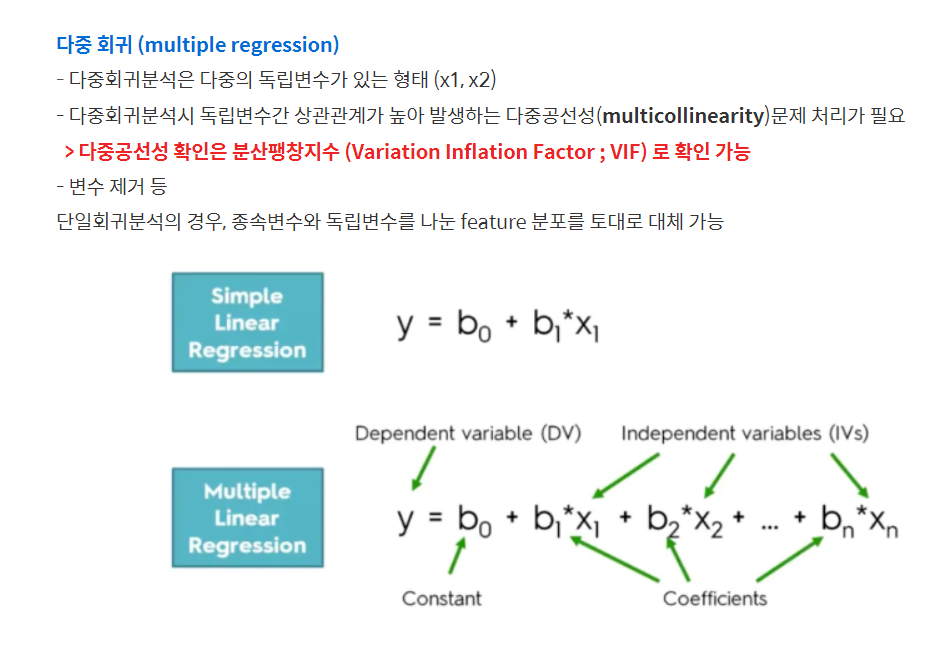

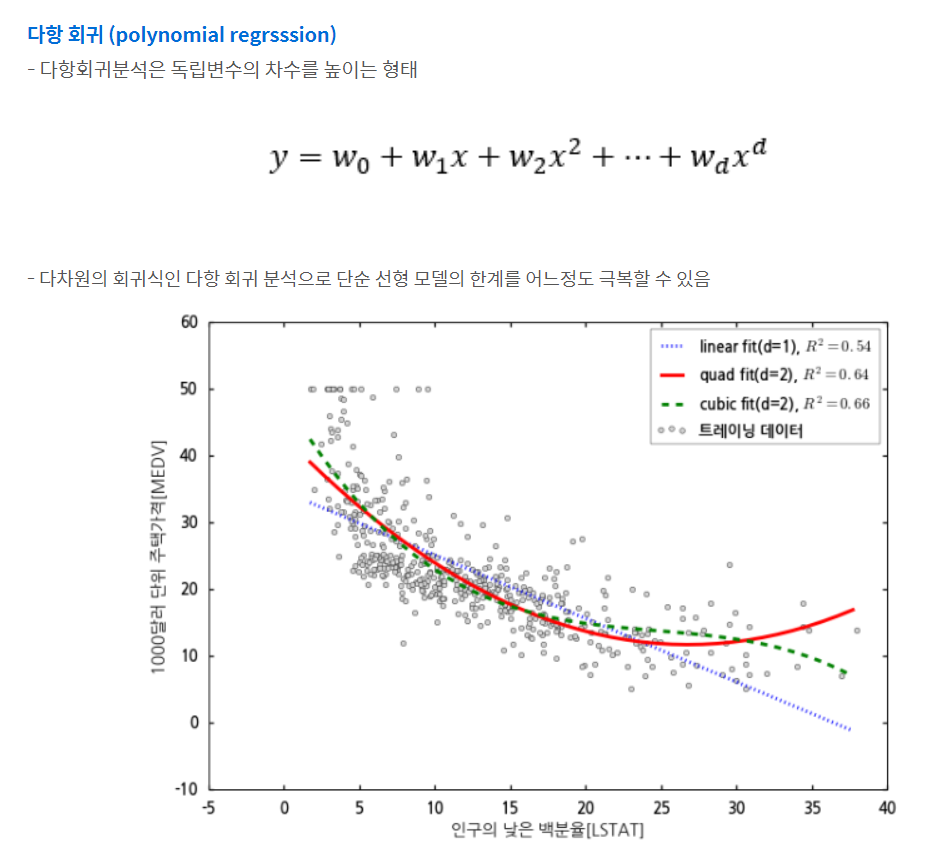

In [27]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2)
print(X)

# transform from (x1, x2)
# to (1, x1 , x2 , x1^2, x1*x2 , x2^2 ,  x1^3 , x1*x2^2 , x2^3)

poly3 = PolynomialFeatures(degree=3)
poly3.fit_transform(X)

# 일차 단항식 계수 피처
# [[0 1]
#  [2 3]
#  [4 5]]

# 변환된 3차 다항식 계수 피쳐
# array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
#        [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
#        [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

[[0 1]
 [2 3]
 [4 5]]


array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [28]:
X = np.arange(6).reshape(6,1)
print(X)

# transform from (x1, x2)
# to (1, x1 , x2 , x1^2, x1*x2 , x2^2 ,  x1^3 , x1*x2^2 , x2^3)

poly3 = PolynomialFeatures(degree=3)
poly3.fit_transform(X)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [4]:
X = np.arange(12).reshape(4,3)
print(X)

# transform from (x1, x2, x3)
# to (1, x1, x2, x3, x1^2, x1*x2 , x1*x3 , x2^2 , x2*x3 , x3^2)

poly2 = PolynomialFeatures(degree=2)
poly2.fit_transform(X)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  11.,  81.,  90.,  99., 100., 110., 121.]])

In [41]:
X = np.arange(6).reshape(3,2)
print(X)

poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

**3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성**

즉 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$ 

In [44]:
# 다항식 생성 함수

def polynominal_func(X):
    y = 1+ 2*X[:,0] +3*X[:,0]**2+4*X[:,1]**3
    return y

In [47]:
print(X[:,1])

[1 3 5]


In [43]:
x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n' , x)
y = polynominal_func(x)
print('삼차 다항식 결정값 : \n' , y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


**3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습**

In [50]:
from sklearn.linear_model import LinearRegression

# X = np.arange(0,4).reshape(2,2)

# 아니면 직접 데이터 만들기
# X = np.arange(0,4).reshape(2,2)

X = np.array([[2,3] , [4,2] , [9,1]])
print('X \n' , X)


y = polynominal_func(X)
print('y \n' , y)



poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 : \n ' , poly_ftr)

model = LinearRegression()
model.fit(poly_ftr , y) #3차 다항식 계수와 , 결과값으로 fit(학습)
print('다항 회귀 계수 : \n' ,np.round(model.coef_,2))


X 
 [[2 3]
 [4 2]
 [9 1]]
y 
 [125  89 266]
3차 다항식 계수 : 
  [[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   2.  16.   8.   4.  64.  32.  16.   8.]
 [  1.   9.   1.  81.   9.   1. 729.  81.   9.   1.]]
다항 회귀 계수 : 
 [-0.   -0.12  0.07 -0.47 -0.15  0.37  0.42 -1.2   0.11  1.43]


### 파이프라인(Pipeline)을 이용한 3차 다항회귀 학습  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

**`sklearn.pipeline의 Pipeline 클래스`**

- 연속된 변환을 순서대로 처리할 수 있도록 도와주는 클래스

- 형식 : 연속된 단계를 나타내는 (name, transforms) 튜플 목록을 입력받음
    - 마지막 단계에서는 transforms와 estimator를 모두 사용할 수 있고, 그외는 transforms여야 함
    - transforms는 fit_transform() 메서드를 가지고 있어야 함
    - estrimator는 fit(), predict() 메서드를 가지고 있어야 함
    
- 파이프라인의 fit() 메서드 호출:
    - 모든 transforms의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달
    - 마지막 단계에서는 fit()메서드만 호출

- 파이프라인 객체는 마지막 estimator와 동일한 메서드를 제공

In [12]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly' , PolynomialFeatures(degree=3)),
         ('linear' , LinearRegression())])

In [13]:
pipe.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [15]:
pipe.named_steps
# 각각의 스텝에 접근이 가능함

{'poly': PolynomialFeatures(degree=3), 'linear': LinearRegression()}

In [16]:
np.round(pipe.named_steps['linear'].coef_ , 2)

array([-0.  , -0.12,  0.07, -0.47, -0.15,  0.37,  0.42, -1.2 ,  0.11,
        1.43])

### 가상 데이터 생성 및 다항 회귀 추정

**가상 데이터 생성**

In [53]:
# 2차 다항식 : y=0.5+x^2 + 2*x+2

n = 100
X = np.random.rand(n,1)*6-3
y = 0.5*X**2 + X +2 + np.random.randn(n,1)


In [54]:
X.shape , y.shape

((100, 1), (100, 1))

In [55]:
print(X)

[[ 1.84198567]
 [ 2.87280021]
 [ 1.24294185]
 [-2.25362734]
 [-1.84379781]
 [ 0.85522333]
 [-1.6625951 ]
 [ 1.48452371]
 [-1.05909932]
 [ 2.63522377]
 [-1.85456054]
 [ 1.48034742]
 [-0.43608745]
 [-2.58911069]
 [-0.99687694]
 [ 1.0541871 ]
 [-1.7382746 ]
 [ 2.59399107]
 [ 0.45681828]
 [ 2.43386671]
 [-2.61021336]
 [-1.49000046]
 [-2.09286386]
 [-0.82799088]
 [ 2.54846965]
 [-0.09877532]
 [-2.44779598]
 [-2.61169035]
 [-2.83484317]
 [-2.02677401]
 [ 1.45134447]
 [-0.33462648]
 [-1.51558744]
 [-0.1875237 ]
 [-2.21373223]
 [ 1.12049389]
 [ 1.2831181 ]
 [ 2.2113694 ]
 [ 0.89362939]
 [-1.67844842]
 [ 1.04617404]
 [-1.4459284 ]
 [ 2.60785376]
 [ 2.61959037]
 [-1.17309732]
 [ 0.65530235]
 [ 2.80333993]
 [-0.16300683]
 [ 1.51720885]
 [ 2.24243602]
 [-2.08452953]
 [ 0.14013012]
 [ 2.76364596]
 [ 0.23032196]
 [-0.5196233 ]
 [-0.28205087]
 [ 0.74181015]
 [ 1.81770608]
 [-1.00080387]
 [ 2.33666981]
 [ 0.80239976]
 [-2.55828934]
 [-2.37720195]
 [ 1.11527891]
 [ 1.43306913]
 [ 1.61599618]
 [-1.98631

In [56]:
print(y)

[[ 5.9355793 ]
 [ 8.59989352]
 [ 3.83691982]
 [ 2.78388406]
 [ 2.31090301]
 [ 4.39693472]
 [ 0.84857047]
 [ 4.10293163]
 [ 0.66918021]
 [ 7.66903116]
 [ 3.13459486]
 [ 5.61683213]
 [ 2.63072564]
 [ 1.60484187]
 [-1.25097756]
 [ 5.60799182]
 [ 2.31779885]
 [ 8.42112229]
 [ 1.83998547]
 [ 7.37287208]
 [ 1.79955192]
 [ 0.7886015 ]
 [ 2.44930513]
 [ 2.44773551]
 [ 8.00689388]
 [ 2.91947848]
 [ 1.50336781]
 [ 2.72154275]
 [ 2.47683634]
 [ 1.59950534]
 [ 4.35328028]
 [ 1.93803254]
 [ 1.02442501]
 [ 1.76840703]
 [ 3.27174341]
 [ 3.71276228]
 [ 3.33227065]
 [ 7.90373776]
 [ 3.08245291]
 [ 1.84825493]
 [ 3.70834143]
 [ 0.9426708 ]
 [ 9.08727133]
 [ 8.104601  ]
 [ 2.03000376]
 [ 2.69599111]
 [ 9.45558318]
 [ 2.25631874]
 [ 2.87212834]
 [ 6.86840674]
 [ 2.00597899]
 [ 3.69035073]
 [ 8.74986156]
 [ 2.06695591]
 [ 2.37312369]
 [ 1.98809643]
 [ 1.87518337]
 [ 5.68595084]
 [ 2.93961233]
 [ 5.78170767]
 [ 3.39147205]
 [ 2.39356849]
 [ 3.08013807]
 [ 2.3813824 ]
 [ 4.35681109]
 [ 4.65419576]
 [ 1.08853

**scatterplot**

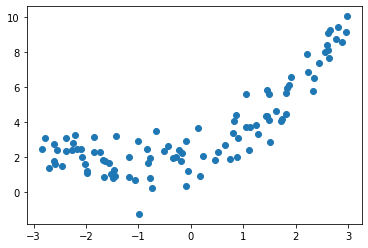

In [57]:
plt.scatter(X , y)

- 비선형적으로 분포하고 있는 데이터에 단순히 직선으로 예측하는 것은 잘 안맞을 것이다.
- 사이킷런의 PolynomialFeatures를 사용

In [71]:
# 파이프 라인
pipe2 = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                  ('linear' , LinearRegression())])
# include_bias는 절편을 만드는 것입니다.
# include_bias = True이면 1 +ax + bx(제곱)와 같이 1 같은 절편을 추가합니다. False이면 추가하지 않습니다.

In [72]:
pipe2.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [73]:
pipe2.named_steps['poly']

PolynomialFeatures(include_bias=False)

In [74]:
np.round(pipe2.named_steps['linear'].coef_, 2)

array([[1.05, 0.49]])

In [75]:
np.round(pipe2.named_steps['linear'].intercept_, 2)

array([1.99])

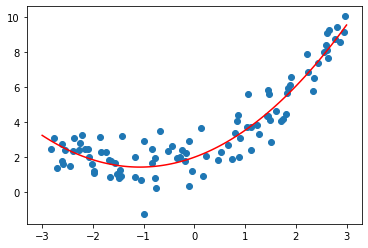

In [76]:

X_new = np.linspace(-3,3,100).reshape(100,1)
y_new = pipe2.predict(X_new)


plt.scatter(X,y)
plt.plot(X_new, y_new , 'r-')



**다항식으로 변환**

**선형회귀 LinearRegression 적용하여 회귀계수 추정**

**다항회귀식 시각화**

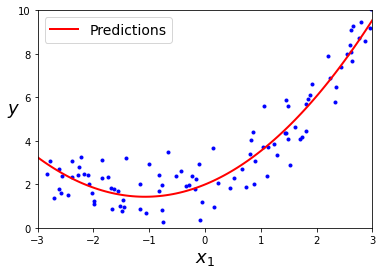

In [77]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feat.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


### 다항회귀를 이용한 보스톤 집값 예측

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [79]:
# 보스턴 데이터 셋 로드
boston = load_boston()

# features & target
X = boston.data
y = boston.target

# y = boston_df['PRICE']
# x = boston_df.drop(['PRICE'] , axis=1 , inplace=True)

# train & test dataset split
X_train , X_test, y_train , y_test = train_test_split(X, y , test_size=0.3 , random_state=156)


In [80]:
bostonM = Pipeline([('poly' , PolynomialFeatures(degree=2)),
                   ('linear' , LinearRegression())])

# Pipeline을 이용하여 PolynomialFeatures 변환과
# LinearRegression 적용을 순차적으로 결합
# 'poly' : 첫 번째 스탭의 이름(변수명처럼 직접 만들어 지어줌)
# 'linear' : 두번째 스탭의 이름 두번째 스탭의 이름

In [81]:
bostonM.fit(X_train , y_train)

print('회귀계수: ' ,np.round(bostonM.named_steps['linear'].coef_ , 2))
bostonM.named_steps['linear'].coef_.shape


회귀계수:  [ 1.09063741e+09 -8.14000000e+00 -1.00000000e-01 -7.00000000e+00
  3.69800000e+01  2.53630000e+02  3.09700000e+01  1.09000000e+00
 -1.20200000e+01  3.10000000e+00 -6.00000000e-02  7.75000000e+00
  2.00000000e-02  4.60000000e-01 -0.00000000e+00  2.70000000e-01
  6.80000000e-01  1.86000000e+00 -1.20000000e-01  9.00000000e-02
  0.00000000e+00 -2.00000000e-01  5.80000000e-01 -6.00000000e-02
  8.70000000e-01 -0.00000000e+00  4.00000000e-02 -0.00000000e+00
 -2.00000000e-02 -1.70000000e-01 -2.09000000e+00 -2.00000000e-02
  0.00000000e+00 -2.00000000e-02  1.00000000e-02  0.00000000e+00
 -2.00000000e-02  0.00000000e+00 -1.00000000e-02  5.00000000e-02
 -4.90000000e-01 -9.00000000e-02  2.90000000e-01  1.00000000e-02
  2.10000000e-01 -5.00000000e-02  0.00000000e+00 -3.00000000e-02
  1.00000000e-02 -1.00000000e-02  3.69800000e+01 -2.92400000e+01
 -5.95000000e+00 -5.00000000e-02  1.77000000e+00 -2.00000000e-02
  3.00000000e-02 -1.90000000e+00  2.00000000e-02 -1.30000000e-01
 -7.70100000e+01 -

(105,)

In [135]:
pred = bostonM.predict(X_test)
mse = mean_squared_error(y_test , pred)
r2 = r2_score(y_test , pred)
rmse = np.sqrt(mse)

print('2차 다항 회귀 결과')
print('mse' , mse)
print('rmse' , rmse)
print('r2' , r2)

mse 24.282312497157736
rmse 4.927708645725489
r2 0.6591816658979074


In [136]:
# 다항식을 쓸 때는 degree에 주의해야함

In [83]:
bostonM = Pipeline([('poly' , PolynomialFeatures(degree=3)),
                   ('linear' , LinearRegression())])

bostonM.fit(X_train , y_train)

# print('회귀계수: ' ,np.round(bostonM.named_steps['linear'].coef_ , 2))
print(bostonM.named_steps['linear'].coef_.shape)
pred = bostonM.predict(X_test)
mse = mean_squared_error(y_test , pred)
r2 = r2_score(y_test , pred)
rmse = np.sqrt(mse)

print('3차 다항 회귀 결과')
print('mse' , mse)
print('rmse' , rmse)
print('r2' , r2)

(560,)
3차 다항 회귀 결과
mse 79625.59310102592
rmse 282.18007211889704
r2 -1116.597922181392


In [84]:
bostonM = Pipeline([('poly' , PolynomialFeatures(degree=1)),
                   ('linear' , LinearRegression())])

bostonM.fit(X_train , y_train)

# print('회귀계수: ' ,np.round(bostonM.named_steps['linear'].coef_ , 2))
bostonM.named_steps['linear'].coef_.shape
pred = bostonM.predict(X_test)
mse = mean_squared_error(y_test , pred)
r2 = r2_score(y_test , pred)
rmse = np.sqrt(mse)

print('1차 다항 회귀 결과')
print('mse' , mse)
print('rmse' , rmse)
print('r2' , r2)

1차 다항 회귀 결과
mse 17.296915907901916
rmse 4.158956107955687
r2 0.7572263323138955
